In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
matches = pd.read_csv('matches.csv')
deliver = pd.read_csv('deliveries.csv')

In [4]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
deliver.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [8]:
matches['team2'].unique()

array(['Royal Challengers Bangalore', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rajasthan Royals', 'Chennai Super Kings', 'Deccan Chargers',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Rising Pune Supergiants'],
      dtype=object)

In [9]:
#cleaning the matches dataframe a bit.
# Replacing the team name with their abbrevation
matches.replace(to_replace=['Royal Challengers Bangalore', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rajasthan Royals', 'Chennai Super Kings', 'Deccan Chargers',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Rising Pune Supergiants'], value=['RCB', 'RPS', 'KKR', 'KXIP',
                                                                                   'DD', 'SRH', 'MI', 'GL', 
                                                                                   'RR', 'CSK', 'DC', 'PWR',
                                                                                  'KTK','RPS'], inplace=True)

In [18]:
print('Total matches played : ', matches.shape[0])
print('Total venues : ', matches['city'].nunique())
print('Venue list : ', matches['city'].unique())

Total matches played :  636
Total venues :  30
Venue list :  ['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Bangalore' 'Mumbai' 'Kolkata'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East London' 'Johannesburg'
 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala'
 'Kochi' 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi' 'Sharjah' nan]


In [25]:
print(matches['player_of_match'].value_counts().idxmax(), ' tops the list with ',
     matches['player_of_match'].value_counts()[1], ' Man of the Match awards')

CH Gayle  tops the list with  16  Man of the Match awards


In [40]:
print(matches['winner'].value_counts().idxmax(), ' tops the list with ',
     matches['winner'].value_counts()[1], ' wins out of ',
     matches[matches['team1'] == matches['winner'].value_counts().idxmax()]['team1'].value_counts().values + matches[matches['team2'] == matches['winner'].value_counts().idxmax()]['team2'].value_counts().values,
     ' matches')

MI  tops the list with  79  wins out of  [157]  matches


In [54]:
print('Total matches : ', matches.shape[0])
print('Team winning toss won in : ', matches[matches['toss_winner'] == matches['winner']].shape[0])
print('Win percentage : ', (matches[matches['toss_winner'] == matches['winner']].shape[0])*100/matches.shape[0])

Total matches :  636
Team winning toss won in :  325
Win percentage :  51.100628930817614


In [66]:
print('Team chasing won in : ', matches[matches['team2'] == matches['winner']]['team1'].shape[0])
print('Win percentage : ', (matches[matches['team2'] == matches['winner']]['team1'].shape[0])*100/matches.shape[0])

Team chasing won in :  349
Win percentage :  54.874213836477985


In [75]:
matches[matches['win_by_runs'] == max(matches['win_by_runs'])][['season', 'team1', 'team2', 'winner', 'win_by_runs']]

,season,team1,team2,winner,win_by_runs
43,2017,MI,DD,MI,146


Mumbai Indians beating Delhi Daredevils in 2017 is the highest win by runs (146)

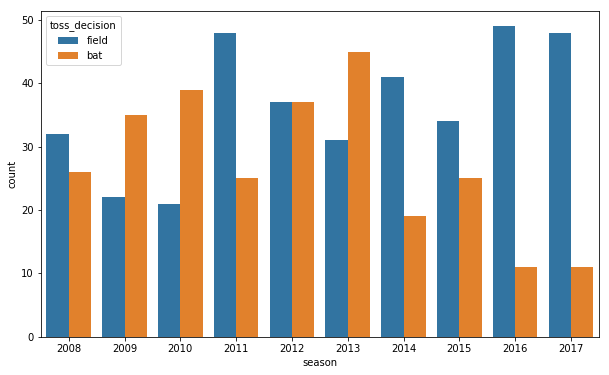

In [85]:
plt.subplots(figsize=(10,6))
sns.countplot(x='season', hue='toss_decision', data=matches)
plt.show()

Teams prefer chasing rather than batting first. Initially the situation was different but now the default choice is batting first.

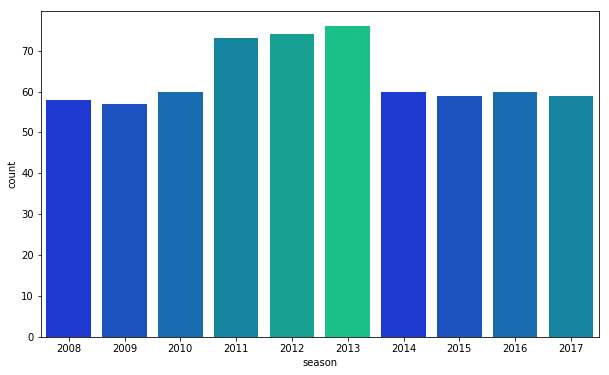

In [91]:
plt.subplots(figsize=(10,6))
sns.countplot(x='season',data=matches,palette=sns.color_palette('winter'))  #countplot automatically counts the frequency of an item
plt.show()

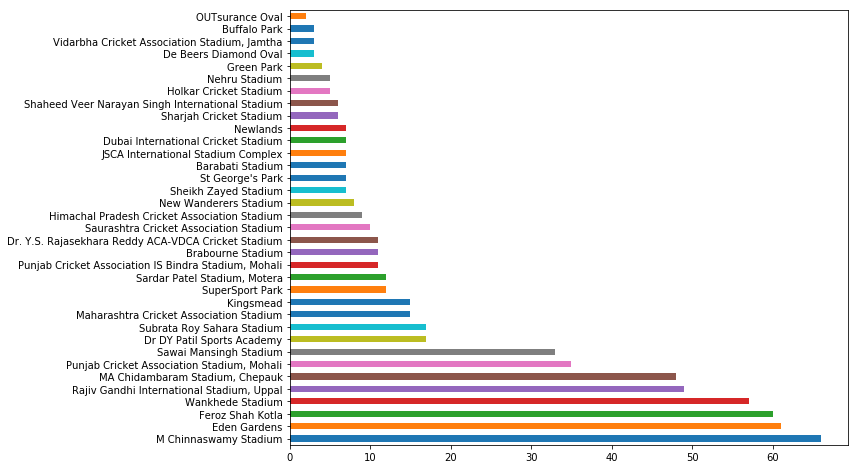

In [111]:
mat = matches['venue'].value_counts()
mat.columns = ["venue", "count"]
plt.subplots(figsize=(10,8))
mat.plot(kind='barh')
plt.show()

Obviously with Chennai being the team appearing in finals for the most time, maximum matches have taken place at M Chinnaswamy Stadium.